In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [8]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [9]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    

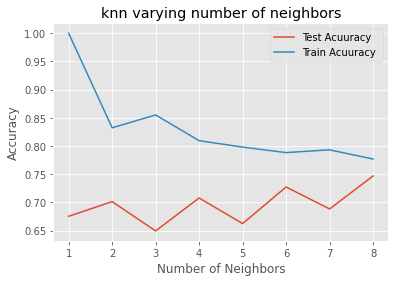

In [12]:
plt.title('knn varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Test Acuuracy ')
plt.plot(neighbors, train_accuracy, label='Train Acuuracy ')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=8)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [15]:
knn.score(X_test, y_test)

0.7467532467532467

In [16]:
y_pred = knn.predict(X_test)

In [17]:
confusion_matrix(y_test, y_pred)

array([[81, 18],
       [21, 34]])

In [19]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,81,18,99
1,21,34,55
All,102,52,154
